In [50]:
#Importing libraries
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks 

# Printing packages versions

In [51]:
print(np.__version__) 
print(tf.__version__) 
print(pd.__version__) 
print(keras.__version__) 

1.18.5
2.2.0
1.0.5
2.3.1


# Displaying the directories and files 


In [52]:
os.listdir('/content/drive/My Drive/2020/ShipsData')

['Ship1.png',
 '0__20160710_182140_0c78__-122.33743457924228_37.75728971371875.png',
 'shipsnet.json',
 '1__20170716_180816_103a__-122.36098977286657_37.766640212768245.png',
 'shipsnet',
 'scenes']

Finding number of files present in folder

In [53]:
len(os.listdir('/content/drive/My Drive/2020/ShipsData/shipsnet/shipsnetfolder'))

4000

In [54]:
len(os.listdir('/content/drive/My Drive/2020/ShipsData/scenes/scenefolder'))

8

# Creating multiple directories  

In [55]:
basefolder="/content/drive/My Drive/2020/ShipsData"
shipsr=os.path.join(basefolder,'shipsnet') 
scenesr=os.path.join(basefolder,'scenes') 

In [56]:
shipsimg=os.path.join(shipsr,'shipsnetfolder')  
scenesimg=os.path.join(scenesr,'scenefolder')

# Selectimg random files

In [57]:
ships_images = os.listdir(shipsimg)
ships_images[:6]

['1__20170827_181130_1014__-122.33912795640656_37.73920986014904.png',
 '1__20170901_181520_0e14__-122.35948134600083_37.76776767609284.png',
 '1__20170901_181520_0e14__-122.36740002724083_37.80182586116483.png',
 '1__20170901_181520_0e14__-122.35176479998303_37.7815966425164.png',
 '1__20170901_181520_0e14__-122.35121081280293_37.74752401629368.png',
 '1__20170901_181520_0e14__-122.35466805228293_37.75722310404933.png']

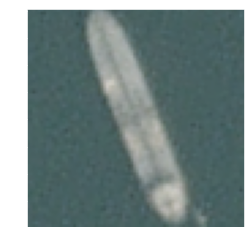

In [58]:
plt.imshow(plt.imread(shipsimg+'/1__20170901_181520_0e14__-122.35466805228293_37.75722310404933.png'))

# **visualising some images from shipsnet**


In [59]:
#Slicing
ships_images = os.listdir(shipsimg)
ships_images[:6]

['1__20170827_181130_1014__-122.33912795640656_37.73920986014904.png',
 '1__20170901_181520_0e14__-122.35948134600083_37.76776767609284.png',
 '1__20170901_181520_0e14__-122.36740002724083_37.80182586116483.png',
 '1__20170901_181520_0e14__-122.35176479998303_37.7815966425164.png',
 '1__20170901_181520_0e14__-122.35121081280293_37.74752401629368.png',
 '1__20170901_181520_0e14__-122.35466805228293_37.75722310404933.png']

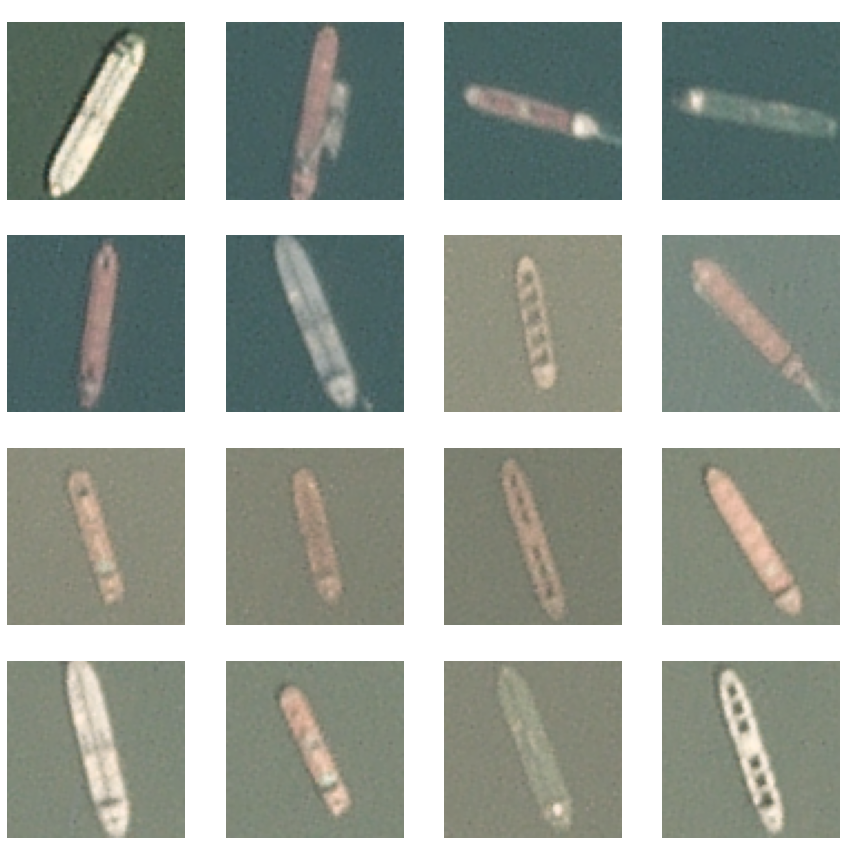

In [60]:
plt.figure(figsize=(15,15))
j=1 
for i in range(16):
  img=plt.imread(os.path.join(shipsimg,ships_images[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j+=1

# visualising scenes images from scenes

In [61]:
scenes_images = os.listdir(scenesimg)
scenes_images[:6]

['lb_1.png', 'lb_2.png', 'sfbay_1.png', 'lb_3.png', 'lb_4.png', 'sfbay_3.png']

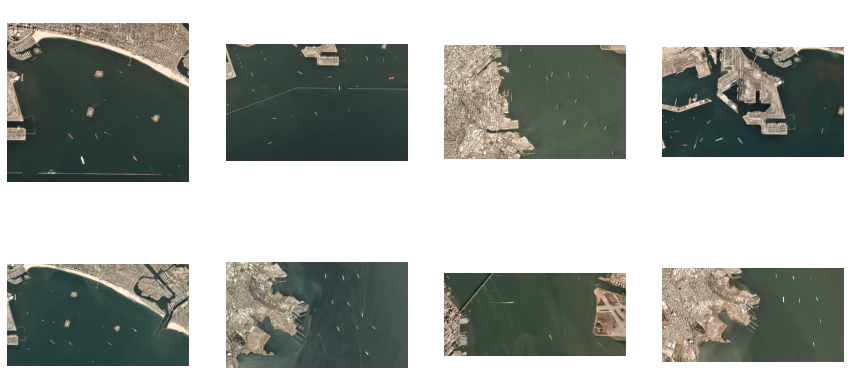

In [62]:
plt.figure(figsize=(15,15))
j=1 
for i in range(8):
  img=plt.imread(os.path.join(scenesimg,scenes_images[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j+=1

# **Opening .json file**


In [63]:
with open('/content/drive/My Drive/2020/ShipsData/shipsnet.json') as file_name:
  z=json.load(file_name)
  ships=pd.DataFrame(z)
  
ships.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [64]:
x=np.array(z['data']).astype('int64')
y=np.array(z['labels']).astype('int64') 

In [65]:
x.shape

(4000, 19200)

In [66]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [67]:
x = x.reshape([-1,3,80,80]).transpose([0,2,3,1])
x.shape

(4000, 80, 80, 3)

# scaling the model


In [68]:
x_data = x / 255 

# Building the data


In [69]:
model = Sequential()
#add a convolutional layer followed by maxpooling
model.add(Conv2D(12,3, padding='same', activation='relu' , input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#add a convolutional layer followed by maxpooling
model.add(Conv2D(24,3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#add a convolutional layer followed by maxpooling
model.add(Conv2D(48,3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96,3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#Final output layer
model.add(Dense(1, activation='sigmoid'))

# Model Summary


In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 80, 80, 12)        336       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 40, 40, 12)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 40, 40, 24)        2616      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 20, 20, 24)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 48)        10416     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 10, 10, 48)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 96)       

# compiling the model

In [71]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy']) 

# fitting the data

In [72]:
history = model.fit(x_data,y,epochs=15,batch_size=32,validation_split=0.2) 

Train on 3200 samples, validate on 800 samples
Epoch 1/15
3200/3200 [==============================] - 22s 7ms/step - loss: 0.2739 - accuracy: 0.8766 - val_loss: 0.4407 - val_accuracy: 0.7987
Epoch 2/15
3200/3200 [==============================] - 22s 7ms/step - loss: 0.1332 - accuracy: 0.9491 - val_loss: 0.2328 - val_accuracy: 0.9050
Epoch 3/15
3200/3200 [==============================] - 22s 7ms/step - loss: 0.0904 - accuracy: 0.9678 - val_loss: 0.1808 - val_accuracy: 0.9187
Epoch 4/15
3200/3200 [==============================] - 22s 7ms/step - loss: 0.0542 - accuracy: 0.9791 - val_loss: 0.8981 - val_accuracy: 0.6938
Epoch 5/15
3200/3200 [==============================] - 22s 7ms/step - loss: 0.0758 - accuracy: 0.9762 - val_loss: 0.1282 - val_accuracy: 0.9463
Epoch 6/15
3200/3200 [==============================] - 22s 7ms/step - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.2242 - val_accuracy: 0.9200
Epoch 7/15
3200/3200 [==============================] - 22s 7ms/step - loss: 0.0311

# Model Accuracy graph

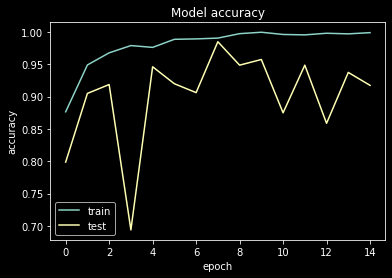

In [73]:
from matplotlib import style
style.use('dark_background')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Value Loass graph

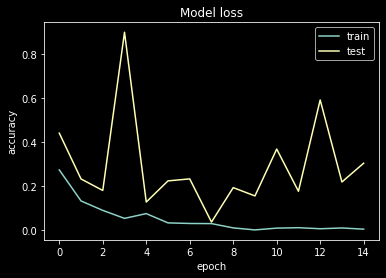

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Image Prediction 

In [75]:
from tensorflow.keras.preprocessing import image 
img=image.load_img('/content/drive/My Drive/2020/ShipsData/1__20170716_180816_103a__-122.36098977286657_37.766640212768245.png') 
type(img)

PIL.PngImagePlugin.PngImageFile

In [76]:
img=tf.keras.preprocessing.image.img_to_array(img) 
print(img.shape)
print(type(img))

(80, 80, 3)
<class 'numpy.ndarray'>


In [77]:
img=tf.image.resize(img,(80,80)) 
img=img/255 
print(img.shape)

(80, 80, 3)


In [78]:
img=np.expand_dims(img,axis=0)
print(img.shape)

(1, 80, 80, 3)


In [79]:
model.predict(img)

array([[1.]], dtype=float32)